# Esame di Metodi Numerici del 7 Maggio 2025

## Ore 14

## Esercizio 1


 Nel file ````test_7_maggio_2025.mat```` sono memorizzati  le matrici di due sistemi lineari:
 
    A  x = b 

    A1 x1 = b1
 
 dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione ed il metodo di Gauss-Seidel, richiamando i risultati teorici opportuni.
 **Punti 1**
 - implementare i tre  algoritmi e  dire quante iterazioni richiede ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 7**
 - Analizzare l'indice di condizionamento delle due matrici e richiamare teoricamente cosa questo implica in termini della velocità di convergenza  dei tre metodi alla soluzione, richiamando i risultati teorici visti a lezione.**Punti 3**


**Punti totali 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_7_maggio_2025')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


[A] è quadrata? True
[A] è grande? Dimensione: 500
[A] è sparsa? True
[A] è simmetrica e definita positiva? True

[A1] è quadrata? True
[A1] è grande? Dimensione: 800
[A1] è sparsa? True
[A1] è simmetrica e definita positiva? True

raggio spettrale Gauss-Seidel  0.9749675725307769
[A] iterazioni Gauss-Seidel: 319
[A] iterazioni Steepest Descent: 1715
[A] iterazioni Gradiente Coniugato: 118


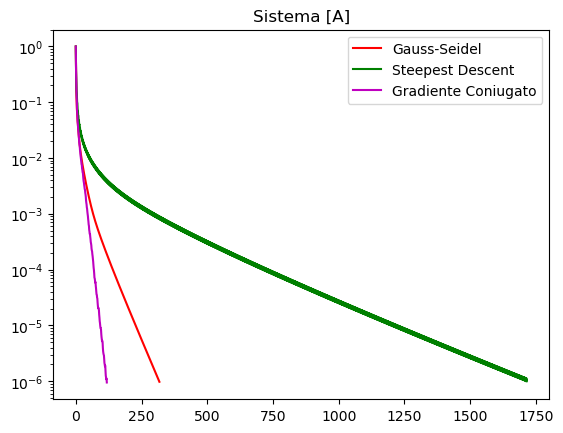

raggio spettrale Gauss-Seidel  0.5940256722011011
[A1] iterazioni Gauss-Seidel: 21
[A1] iterazioni Steepest Descent: 55
[A1] iterazioni Gradiente Coniugato: 21


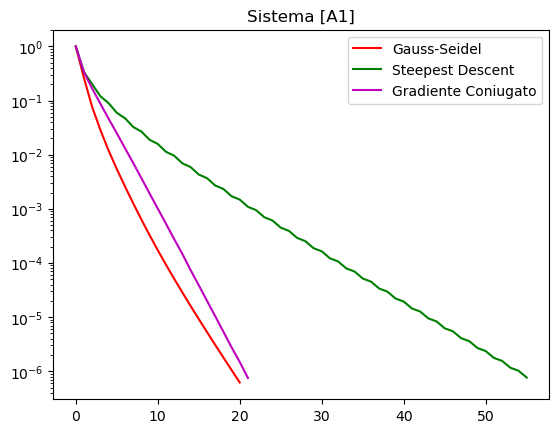

Condizionamento di [A]: 500.00000000001234
Condizionamento di [A1]: 10.00000000000026


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from SolveTriangular import *

dati = loadmat('test_7_maggio_2025')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

# [Punto 1]
# Per applicare i 3 algoritmi, la matrice deve essere quadrata, inoltre deve essere grande e sparsa
# I 2 algoritmi di discesa del gradiente possono essere applicati solo se la matrice è simmetrica e definita positiva.
# Gauss-Seidel, invece, può essere applicato sia nel primo caso sia nel caso in cui sia a diagonale dominante.

# Se la matrice è simmetrica e definita positiva, risolvere il sistema associato equivale a trovare il minimo del funzionale quadratico.

def testMatriceQuadrata(A):
    return A.shape[0] == A.shape[1]

def isSparse(A):
    return np.count_nonzero(A) / A.size < 0.33

def isSimmetric(A):
    return np.allclose(A.T, A)

def isPositive(A):
    return isSimmetric(A) and np.all(np.linalg.eigvals(A) > 0)

print("[A] è quadrata?", testMatriceQuadrata(A))
print("[A] è grande? Dimensione:", A.shape[0])
print("[A] è sparsa?", isSparse(A))
print("[A] è simmetrica e definita positiva?", isPositive(A))

print("")

print("[A1] è quadrata?", testMatriceQuadrata(A1))
print("[A1] è grande? Dimensione:", A1.shape[0])
print("[A1] è sparsa?", isSparse(A1))
print("[A1] è simmetrica e definita positiva?", isPositive(A1))

print("")

# [Punto 2]
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D= np.diag(d)
    E= np.tril(A, -1)
    F= np.triu(A, 1)
    M= D+E
    N= F
    T= np.linalg.inv(M) @ N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale= np.max(np.abs(np.linalg.eigvals(T)))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it < it_max and errore >= toll:
        temp= b - (N @ x0)
        x, flag = Lsolve(M, temp)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore >= tol:
        it=it+1
        Ap= A @ p
        alpha = -(r.T @ p)/(p.T @ Ap)    
        x = x + alpha * p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r
        
    return x,vet_r,vec_sol,it

def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap= A @ p
        alpha = -(r.T @ p)/(p.T @ Ap) 
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T @ r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p
    
    return x,vet_r,vec_sol,it


# Risolviamo i sistemi con i tre metodi
toll = 1e-6
maxit = 2000
x0 = np.zeros((b.size, 1))

x_gs, it_gs, er_vet_gs = gauss_seidel(A,b,x0,toll,maxit)
x_grads, vet_err_grads, vet_sol_grads, it_grads = steepestdescent(A,b,x0,maxit,toll)
x_gradc, vet_err_gradc, vet_sol_gradc, it_gradc = conjugate_gradient(A,b,x0,maxit,toll)

# print("Soluzione Gauss-Seidel:", x_gs[:4])
# print("Soluzione Steepest Descent:", x_grads[:4])
# print("Soluzione Gradiente Coniugato:", x_gradc[:4])

print("[A] iterazioni Gauss-Seidel:", it_gs)
print("[A] iterazioni Steepest Descent:", it_grads)
print("[A] iterazioni Gradiente Coniugato:", it_gradc)

plt.title("Sistema [A]")
plt.semilogy(np.arange(it_gs), er_vet_gs, "r-")
plt.semilogy(np.arange(it_grads + 1), vet_err_grads, "g-")
plt.semilogy(np.arange(it_gradc + 1), vet_err_gradc, "m-")
plt.legend(['Gauss-Seidel', 'Steepest Descent', 'Gradiente Coniugato'])
plt.show()

x0 = np.zeros((b1.size, 1))

x_gs, it_gs, er_vet_gs = gauss_seidel(A1,b1,x0,toll,maxit)
x_grads, vet_err_grads, vet_sol_grads, it_grads = steepestdescent(A1,b1,x0,maxit,toll)
x_gradc, vet_err_gradc, vet_sol_gradc, it_gradc = conjugate_gradient(A1,b1,x0,maxit,toll)

# print("Soluzione Gauss-Seidel:", x_gs[:4])
# print("Soluzione Steepest Descent:", x_grads[:4])
# print("Soluzione Gradiente Coniugato:", x_gradc[:4])

print("[A1] iterazioni Gauss-Seidel:", it_gs)
print("[A1] iterazioni Steepest Descent:", it_grads)
print("[A1] iterazioni Gradiente Coniugato:", it_gradc)

plt.title("Sistema [A1]")
plt.semilogy(np.arange(it_gs), er_vet_gs, "r-")
plt.semilogy(np.arange(it_grads + 1), vet_err_grads, "g-")
plt.semilogy(np.arange(it_gradc + 1), vet_err_gradc, "m-")
plt.legend(['Gauss-Seidel', 'Steepest Descent', 'Gradiente Coniugato'])
plt.show()

# [Punto 3]
print("Condizionamento di [A]:", np.linalg.cond(A))
print("Condizionamento di [A1]:", np.linalg.cond(A1))

# Notiamo che Gradiente-Congiugato risolve entrambi i sistemi con meno iterazioni rispetto agli altri due algoritmi.
# Questo perché la velocità di convergenza del Gradiente-Coniugato dipende dalla radice del condizionamento "sqrt(A)",
# mentre Steepest-Descent dipende in maniera quadratica dal condizionamento (ovvero, un maggiore condizionamento influisce molto di più
# su Steepeset-Descent rispetto che su Gradiente-Coniugato).
# Per Gauss-Seidel è interessante osservare il raggio spettrale, che è molto vicino a 1.
# Più il raggio spettrale è vicino a 1, più la convergenza rallenta.
# Se si implementasse Gauss-Siedel-SOR con un opportuno omega, si osserverebbe il raggio spettrale avvicinarsi a 0 e, di conseguenza, la convergenza accelerare.

## Esercizio  2

**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,3$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \\
y_1=1, \quad y_2=0, \quad y_3=4 .
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare  ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i tre punti assegnati, e si denotino con ${\bf M}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 3**]

- si calcola la soluzione del sistema lineare ${\bf M}{\bf a}={\bf b}$ usando il metodo di fattorizzazione adatto alle caratteristiche della matrice $M$[**punti 2**]

- dopo averne determinato centro e raggio (vedi sotto formula), si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ (dove i coefficienti $a_i$ rappresentano la soluzione del sistema lineare del punto precedente) e i tre punti assegnati dal problema.[**punti 1**]
- Abbiamo costruito la circonferenza  ..**approssimante**.. i punti del piano
  [**punti 1**] 
  (completare al posto dei puntini)


Condizionamento di M: 10.403882032022073

Soluzione attesa: [[-7.]
 [-7.]
 [12.]]
Soluzione LU: [[-7.]
 [-7.]
 [12.]]


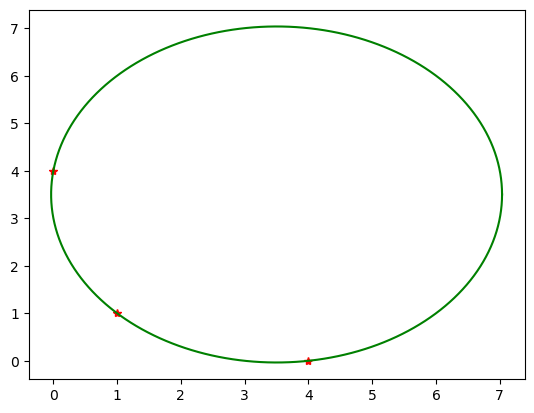

In [180]:
import scipy.linalg as spl

input_x = np.array([1, 4, 0])
input_y = np.array([1, 0, 4])

# [Punto 1]
# Sostituiamo x e y all'equazione della circonferenza (per ogni "i")
# [1] -> 1 + 1 + 1*a1 + 1*a2 + a3 = 0 ->  a1 + a2 + a3 = -2 
# [2] -> 16 + 4*a1 + a3 = 0           -> 4a1      + a3 = -16
# [3] -> 16 + 4*a2 + a3 = 0           ->      4a2 + a3 = -16

# Quindi:
M = np.array([
    [1, 1, 1],
    [4, 0, 1],
    [0, 4, 1]])

b = np.array([-2, -16, -16]).reshape(3, 1)

# [Punto 2]
print("Condizionamento di M:", np.linalg.cond(M))
print("")

x = np.linalg.solve(M, b)
print("Soluzione attesa:", x)

# La matrice è ben condizionata, quadrata, piccola e densa,
# ma non è simmetrica e def. pos., inoltre non è a diagonale dominante.
# Usiamo quindi la fattorizzazione LU di Gauss
PT, L, U = spl.lu(M)
P = P.T
z, flag = Lsolve(L, P @ b)
if flag == 0:
    x, flag = Usolve(U, z)

print("Soluzione LU:", x)

# [Punto 3]
a1 = x[0]
a2 = x[1]
a3 = x[2]

cx = -a1/2
cy = -a2/2

r = np.sqrt((a1*a1)/4 + (a2*a2)/4 - a3)

funx = lambda t: cx + r * np.cos(t)
funy = lambda t: cy + r * np.sin(t)

tt = np.linspace(0, np.pi * 2, 200)

xx = funx(tt)
yy = funy(tt)

plt.plot(1, 1, "r*")
plt.plot(4, 0, "r*")
plt.plot(0, 4, "r*")
plt.plot(xx, yy,"g-")

plt.show()

**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \quad x_4=5 \\
y_1=1, \quad y_2=0, \quad y_3=4  \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare sovradeterminanto ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf c}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 1**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf c}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf c}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 1**]
-  
**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$


**Punti totali 14**

Condizionamento di M: 10.403882032022073

Soluzione QRLS (appros. ai minimi quadrati): [[-6.81308411]
 [-6.76502003]
 [12.88651535]]


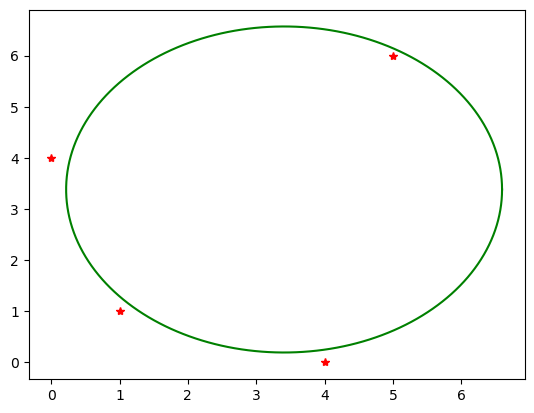

In [178]:
input_x = np.array([1, 4, 0, 5])
input_y = np.array([1, 0, 4, 6])

# [Punto 1]
# Sostituiamo x e y all'equazione della circonferenza (per ogni "i")
# [1] -> 1 + 1 + 1*a1 + 1*a2 + a3 = 0   ->  a1 +  a2 + a3 = -2 
# [2] -> 16 + 4*a1 + a3 = 0             -> 4a1       + a3 = -16
# [3] -> 16 + 4*a2 + a3 = 0             ->       4a2 + a3 = -16
# [4] -> 25 + 36 + 5*a1 + 6*a2 + a3 = 0 -> 5a1 + 6a2 + a3 = -61

# Quindi:
A = np.array([
    [1, 1, 1],
    [4, 0, 1],
    [0, 4, 1],
    [5, 6, 1]])

c = np.array([2, -16, -16, -61]).reshape(4, 1)

# [Punto 2]
print("Condizionamento di M:", np.linalg.cond(M))
print("")

def qrLS(A,b):
    #Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=spl.qr(A)
    h= Q.T @ b
    x,flag= Usolve(R[0:n,:], h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

x, residuo = qrLS(A, c)

print("Soluzione QRLS (appros. ai minimi quadrati):", x)

# [Punto 3]
a1 = x[0]
a2 = x[1]
a3 = x[2]

cx = -a1/2
cy = -a2/2

r = np.sqrt((a1*a1)/4 + (a2*a2)/4 - a3)

funx = lambda t: cx + r * np.cos(t)
funy = lambda t: cy + r * np.sin(t)

tt = np.linspace(0, np.pi * 2, 200)

xx = funx(tt)
yy = funy(tt)

plt.plot(1, 1, "r*")
plt.plot(4, 0, "r*")
plt.plot(0, 4, "r*")
plt.plot(5, 6, "r*")
plt.plot(xx, yy,"g-")
plt.show()

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)?

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.


Risposta: PUNTO [**3**] 

**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete


Risposta: PUNTO [**B**]

3- Quale delle seguenti affermazioni è vera riguardo ai layer convoluzionali in una rete CNN?

(a) I layer convoluzionali applicano una funzione di attivazione a ciascun elemento della feature map in ingresso.

(b) I layer convoluzionali eseguono una convoluzione tra i filtri convoluzionali e la feature map in ingresso, producendo una nuova feature map.

(c) I layer convoluzionali riducono la dimensione spaziale della feature map in ingresso.

(d) I layer convoluzionali aumentano la dimensione spaziale della feature map in ingresso.

Risposta: PUNTO [**B**]

**4.**  
Quale tra le seguenti affermazioni descrive   il compito della funzione di attivazione nel training di una rete neurale?

- Trasformare i dati di input in un formato compatibile con la rete neurale

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


Risposta: PUNTO [**2**]

**5.** Quale tra le seguenti affermazioni è FALSA riguardo alla suddivisione del dataset in un contesto di machine learning?

- La suddivisione del dataset in set di training, validation e test è fondamentale per valutare correttamente le prestazioni di un modello di machine learning.
- Il set di training viene utilizzato per addestrare il modello sui dati.
- Il set di validation viene utilizzato per trovare le etichette dei dati di input
- Il set di test viene utilizzato per valutare le prestazioni finali del modello su dati che non sono stati utilizzati per il training o la validation

# Domande aperte

**6. Descrivi in cosa consiste la fase di forward-propagation e back-propagation nell'ambito del training di una rete neurale, soffermandoti sull'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 3]**